In [131]:
import pandas as pd

df = pd.read_csv("/kaggle/input/hr-analytics/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [133]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(11991, 10)

In [134]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [135]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())

Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64
salary
low       5740
medium    5261
high       990
Name: count, dtype: int64


In [136]:
print(df['Department'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["salary"] = le.fit_transform(df["salary"])

dummy = pd.get_dummies(df.Department)
df_final = pd.concat([df,dummy],axis="columns")
df_final = df_final.drop(['Department'], axis ="columns")
x = df_final.drop(['IT'], axis ="columns")


df_final

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,2,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,2,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,1,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,1,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,False,False,False,False,True,False,False,False,False,False
11996,0.74,0.95,5,266,10,0,0,1,0,False,False,False,False,True,False,False,False,False,False
11997,0.85,0.54,3,185,10,0,0,1,0,False,False,False,False,True,False,False,False,False,False
11998,0.33,0.65,3,172,10,0,0,1,0,False,False,False,False,False,True,False,False,False,False


In [138]:
print(df['Department'].unique())
print(df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
[1 2 0]


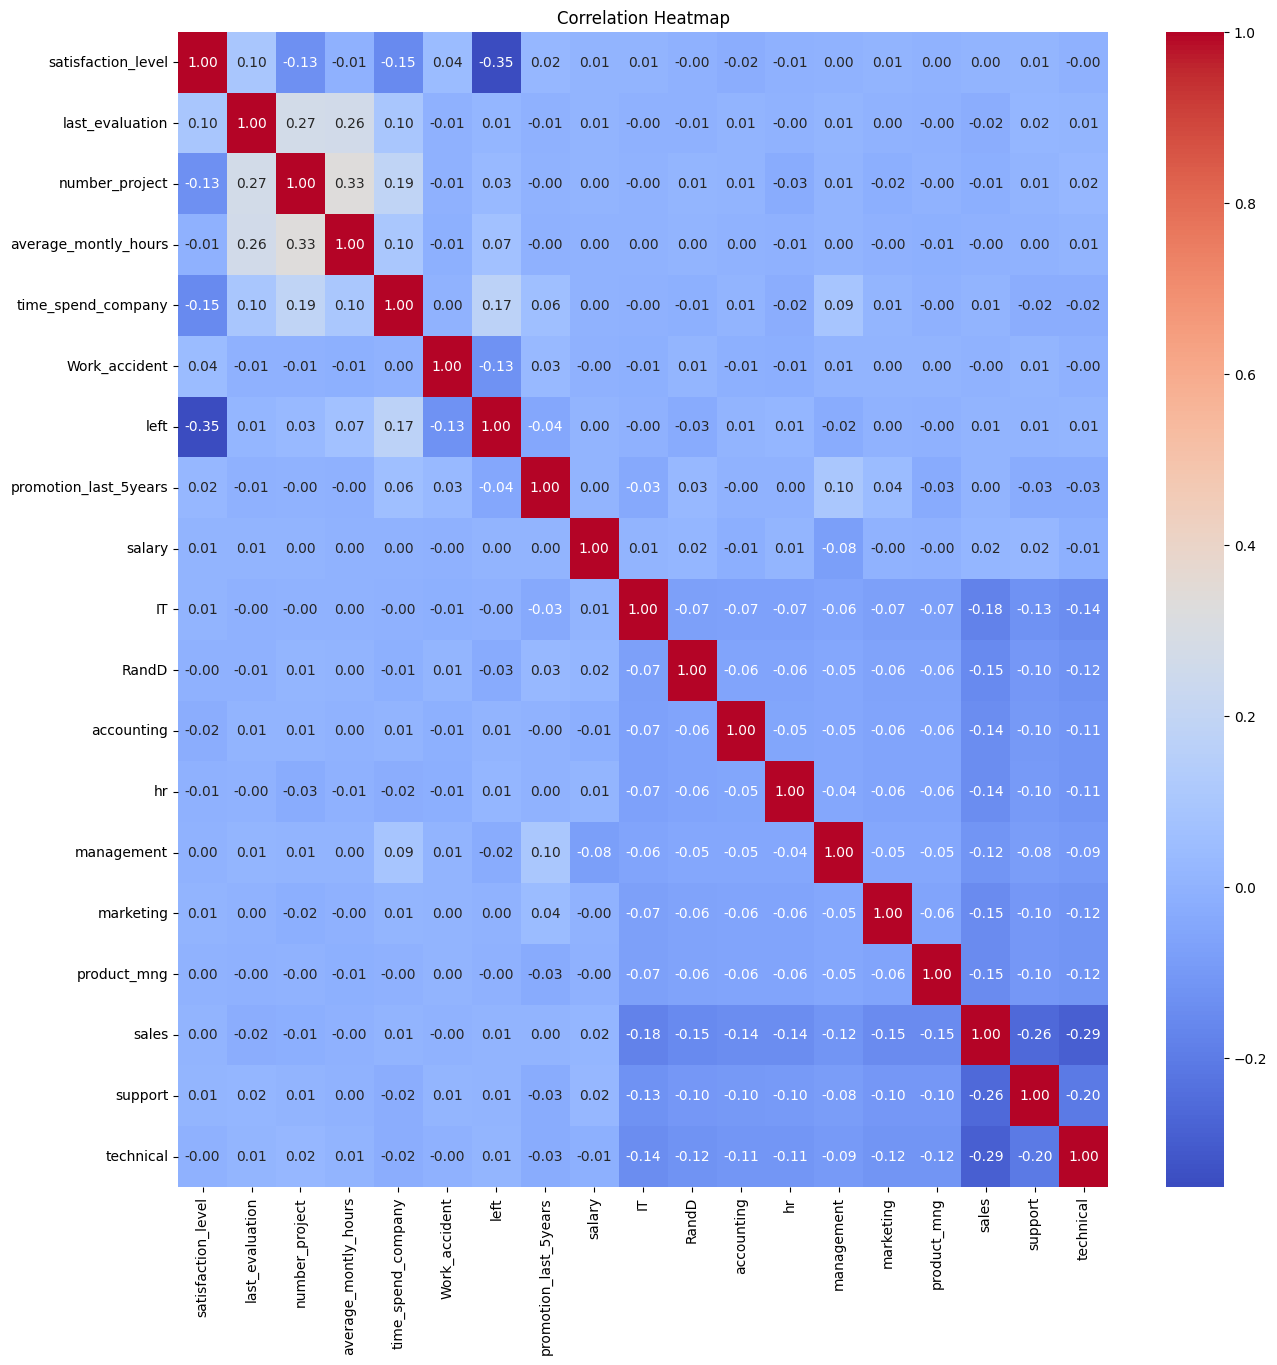

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(df_final.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

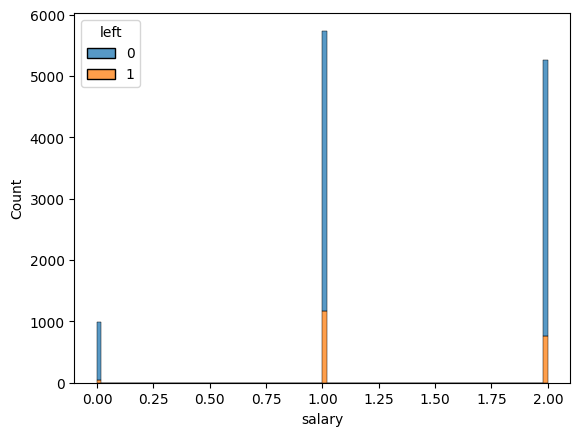

In [140]:
sns.histplot(data=df_final,x=df.salary,hue=df.left,multiple="stack",bins=100)
plt.show()

In [141]:
x = df_final["IT"]
x.info()

<class 'pandas.core.series.Series'>
Index: 11991 entries, 0 to 11999
Series name: IT
Non-Null Count  Dtype
--------------  -----
11991 non-null  bool 
dtypes: bool(1)
memory usage: 105.4 KB


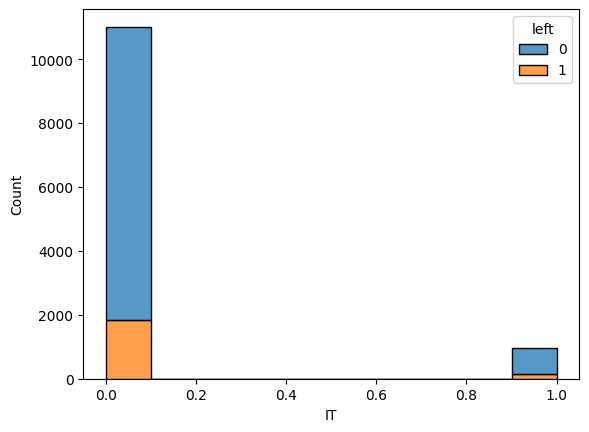

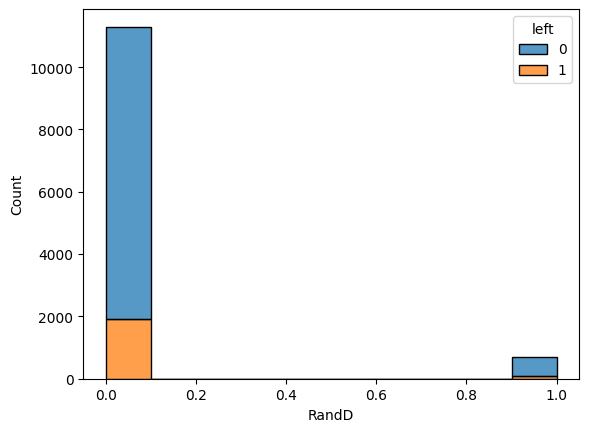

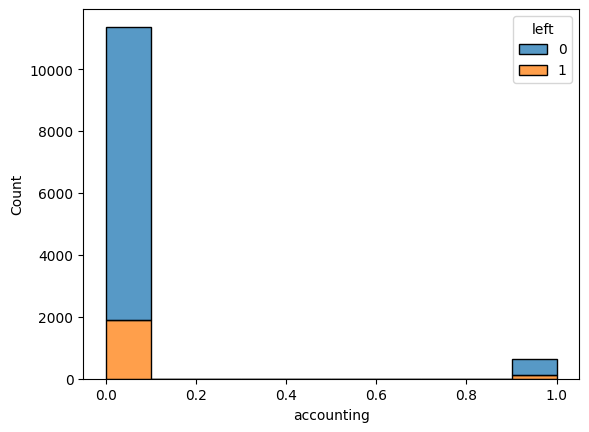

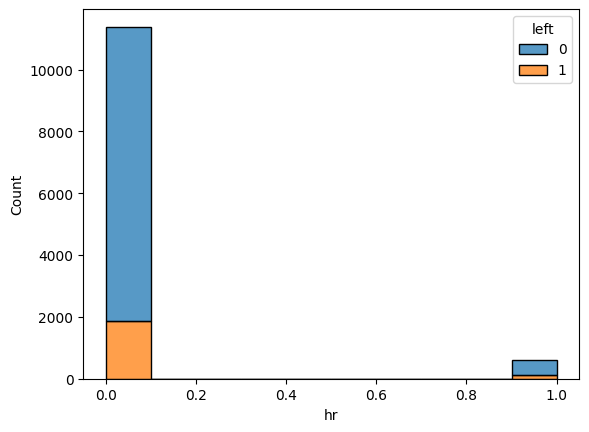

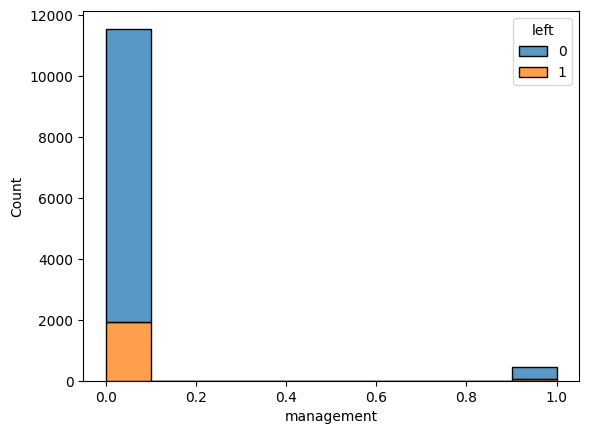

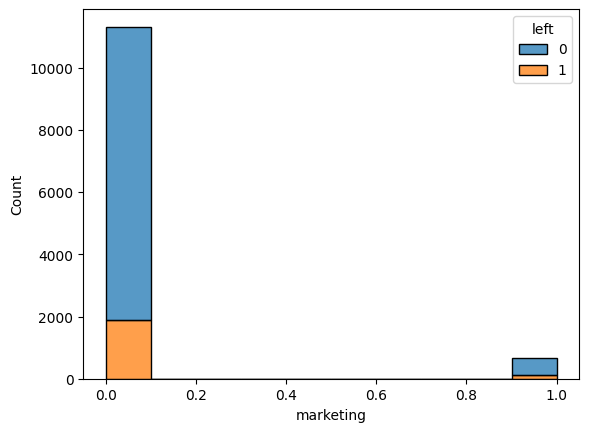

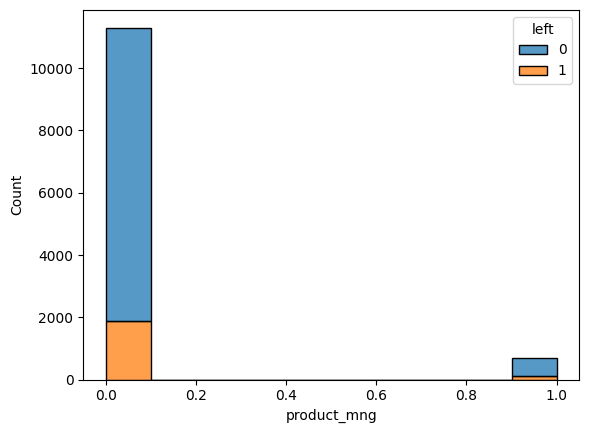

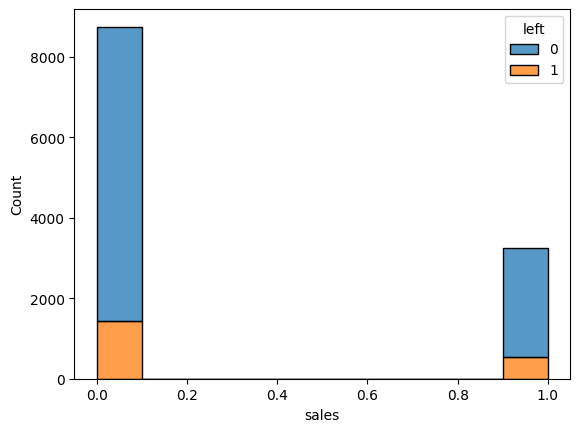

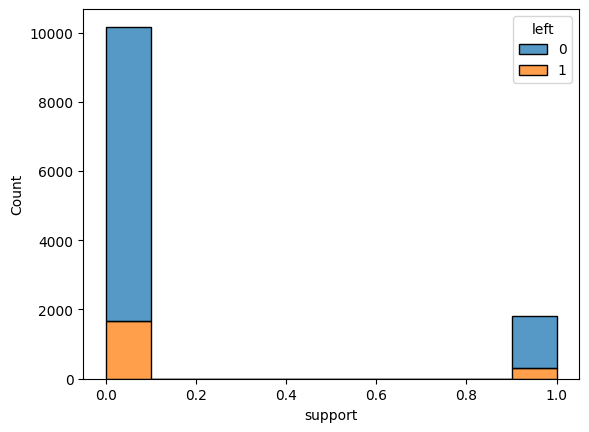

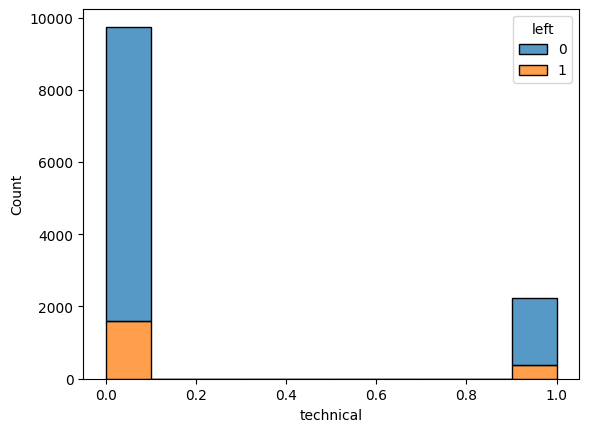

In [142]:
for i in df_final.select_dtypes(include="bool").columns:
    sns.histplot(data=df_final,x=i,hue=df_final["left"],multiple="stack",bins =10)
    plt.show()

In [143]:
x = df_final.drop(["left","IT"],axis="columns")
y = df_final.left

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [145]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [146]:
accuracy_on_testingdataset = model.score(X_test,Y_test)*100
accuracy_on_trainingdataset = model.score(X_train,Y_train)*100
accuracy_on_entiredataset = model.score(x,y)*100

print("accuracy on testingdataset :{}%".format(accuracy_on_testingdataset))
print("accuracy on trainingdataset :{}%".format(accuracy_on_trainingdataset))
print("accuracy on_entiredataset :{}%".format(accuracy_on_entiredataset))

accuracy on testingdataset :83.90996248436848%
accuracy on trainingdataset :82.76688907422852%
accuracy on_entiredataset :82.9955800183471%



**Here we are trying to implement a model which only sees the most important parameters and compare score with the one trained with all params**


In [153]:
x_new = x[["satisfaction_level","average_montly_hours","time_spend_company","Work_accident","promotion_last_5years"]]
x_new.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,157,3,0,0
1,0.80,262,6,0,0
2,0.11,272,4,0,0
3,0.72,223,5,0,0
4,0.37,159,3,0,0


In [155]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(x_new,y,test_size=0.2)
model2 = LogisticRegression()
model2.fit(X_train2,Y_train2)
model2.predict(X_test2)

array([0, 0, 0, ..., 0, 0, 0])

In [156]:
accuracy_on_testingdataset = model2.score(X_test2,Y_test2)*100
accuracy_on_trainingdataset = model2.score(X_train2,Y_train2)*100
accuracy_on_entiredataset = model2.score(x_new,y)*100

print("accuracy on testingdataset :{}%".format(accuracy_on_testingdataset))
print("accuracy on trainingdataset :{}%".format(accuracy_on_trainingdataset))
print("accuracy on_entiredataset :{}%".format(accuracy_on_entiredataset))

accuracy on testingdataset :84.99374739474781%
accuracy on trainingdataset :83.89282735613011%
accuracy on_entiredataset :84.1130848136102%


Result : There isn't much increment in Accuracy but yes few high priority variables can be focused more on and we can still attain same accurate results